<a href="https://colab.research.google.com/github/thompf2/Machine-Learning-Engineering/blob/main/MLE_Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HOMEWORK #2

FAYDIA THOMPSON (RIN: 662020314)

PROBLEM 1:

Instead of the four features being sepal width, sepal length, petal width, and petal length can turn them into two features using ratios. So the new two features would be sepal length/speal width and petal length/petal width.

The accuracy score is 0.75



In [ ]:
import numpy as np

from sklearn import datasets

iris = datasets.load_iris()

iris.data

iris.feature_names

iris.target_names

iris.target

sepal_ratio = iris.data[:, 0]/iris.data[:, 1]

petal_ratio = iris.data[:, 2]/iris.data[:, 3]

X = np.column_stack((sepal_ratio, petal_ratio))
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print(preds)

print('actual iris species')
print(y_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)


[2 1 1 2 0 2 1 0 0 1 0 2 2 2 1 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 1 0 1 2 2 2 1
 2 0 1 0 1 2 2 0 1 2 1 0 0 1 1 1 1 1 1 1 1 1 2]
actual iris species
[1 1 1 1 0 1 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]
accuracy score : 0.75


PROBLEM 2:

We cannot use pairplot to visualize the data.

In my test set 949 6's were correctly classified.



training images shapes:  (60000, 28, 28)
testing images shapes:  (10000, 28, 28)
training targets shapes:  (60000,)
testing targets shapes:  (10000,)
Accuracy: 0.9868047097036134


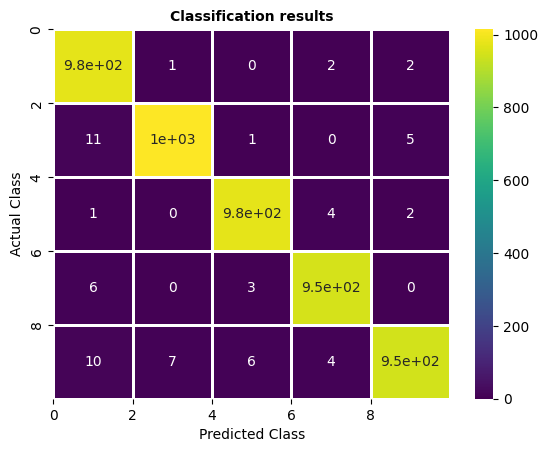

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           2       0.99      0.98      0.99      1032
           4       0.99      0.99      0.99       982
           6       0.99      0.99      0.99       958
           8       0.99      0.97      0.98       974

    accuracy                           0.99      4926
   macro avg       0.99      0.99      0.99      4926
weighted avg       0.99      0.99      0.99      4926

Number of correctly classified 6's: 949


In [11]:
import numpy as np
import tensorflow as tf
from numpy import loadtxt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("training images shapes: ", x_train.shape)
print("testing images shapes: ", x_test.shape)
print("training targets shapes: ", y_train.shape)
print("testing targets shapes: ", y_test.shape)

# Filter out even digits : (0, 2, 4, 6, 8)
even_digits = [0, 2, 4, 6, 8]

# Apply the filter to data
even_train_indices = np.isin(y_train, even_digits)
even_test_indices = np.isin(y_test, even_digits)

X_train_even = x_train[even_train_indices]
y_train_even = y_train[even_train_indices]
X_test_even = x_test[even_test_indices]
y_test_even = y_test[even_test_indices]

# flatten images for KNN
X_train = X_train_even.reshape(X_train_even.shape[0], -1)
X_test = X_test_even.reshape(X_test_even.shape[0], -1)

# initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model
knn.fit(X_train, y_train_even)

# make predictions
preds = knn.predict(X_test)

# print the accuracy
print("Accuracy:", accuracy_score(y_test_even, preds))

# confusion matrix
cm = confusion_matrix(y_test_even, preds)
ax = sns.heatmap(cm, linewidths=2, annot=True, cmap='viridis', cbar=True)

# Set the tick locations and labels to match even_digits
ax.set_xticks(np.arange(len(even_digits))) # Set x-tick locations to 0, 1, 2, 3, 4
ax.set_xticklabels(even_digits)            # Set x-tick labels to 0, 2, 4, 6, 8

ax.set_yticks(np.arange(len(even_digits))) # Set y-tick locations to 0, 1, 2, 3, 4
ax.set_yticklabels(even_digits)            # Set y-tick labels to 0, 2, 4, 6, 8

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Classification results', fontsize='medium', fontweight='bold')
plt.show()

# classification report
print(classification_report(y_test_even, preds))

# count correctly classified 6's
correct_sixes = cm[even_digits.index(6), even_digits.index(6)]
print(f"Number of correctly classified 6's: {correct_sixes}")


PROBLEM 3:

The clustering performance of the k-means algorithm and the sklearn implementation are nearly identical at k = 3.

As the value of k increases, the k-means algorithm and sklearn implementation results start to vary slightly more and more.

custom kmeans clusters: [0 0 0 0 2 1 0 2 2 1 2 1 0 0 1 2 0 1 2 1 1 2 1 2 2 1 1 2 2 2 2 2 0 1 2 0 0
 1 2 0 2 1 1 1 2 1 0 1 2 2 0 0 1 1 1 0 0 1 0 0]
scikit-learn kmeans clusters: [2 2 2 2 0 1 2 0 0 1 0 1 1 2 1 0 2 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 2 1 0 2 2
 1 0 2 0 1 1 1 0 1 1 1 0 0 1 2 1 1 1 2 2 1 2 2]


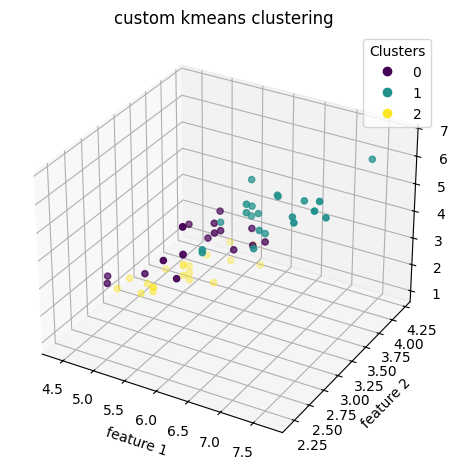

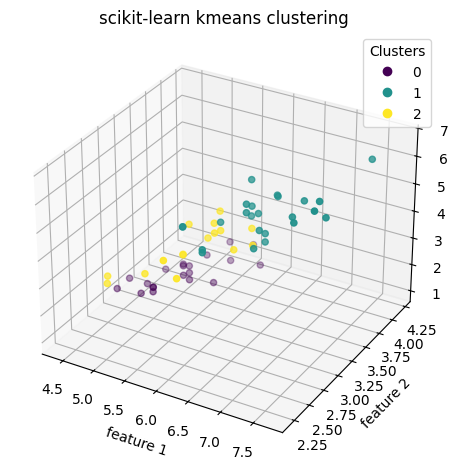

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

# load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :3]  # only selecting the first three features
y = iris.target

# splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, train_size=0.60, random_state=123, shuffle=True, stratify=y)

class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check for convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
              self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]

# create and fit the custom kmeans model
kmeans = KMeans(k=3)
kmeans.fit(X_train)
preds = kmeans.predict(X_test)

# show some results
print("custom kmeans clusters:", preds)

# scikit-learn's kmeans
from sklearn.cluster import KMeans

skmodel = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
 )

skmodel.fit(X_train)
sk_preds = skmodel.predict(X_test)


print("scikit-learn kmeans clusters:", sk_preds)

# custom kmeans cluster plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=preds, cmap='viridis')
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3')
ax.set_title('custom kmeans clustering')
handles, labels = sc.legend_elements()
ax.legend(handles, labels, title="Clusters")
plt.tight_layout()
plt.show()

# scikit-learn kmeans cluster plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=sk_preds, cmap='viridis')
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3')
ax.set_title('scikit-learn kmeans clustering')
handles, labels = sc.legend_elements()
ax.legend(handles, labels, title="Clusters")
plt.tight_layout()
plt.show()